In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#import data
price_data = pd.read_csv('Price_Data_csv.csv')
price_data.dtypes

time                       float64
ema(4)                     float64
high low span              float64
high above ema             float64
close above ema            float64
close relative to high     float64
volume change              float64
volume relative to span    float64
to buy                     float64
dtype: object

In [12]:
#split into x and y 
X = price_data.drop("to buy", axis=1)
y = price_data["to buy"].values.reshape(-1,1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [13]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

k: 1, Train/Test Score: 1.000/-0.630
k: 3, Train/Test Score: 0.430/-0.095
k: 5, Train/Test Score: 0.312/-0.002
k: 7, Train/Test Score: 0.269/0.042
k: 9, Train/Test Score: 0.239/0.062
k: 11, Train/Test Score: 0.221/0.074
k: 13, Train/Test Score: 0.209/0.087
k: 15, Train/Test Score: 0.197/0.094
k: 17, Train/Test Score: 0.189/0.097
k: 19, Train/Test Score: 0.183/0.102
k: 21, Train/Test Score: 0.177/0.108
k: 23, Train/Test Score: 0.174/0.109
k: 25, Train/Test Score: 0.172/0.108
k: 27, Train/Test Score: 0.169/0.110
k: 29, Train/Test Score: 0.166/0.112
k: 31, Train/Test Score: 0.164/0.113
k: 33, Train/Test Score: 0.161/0.113
k: 35, Train/Test Score: 0.159/0.115
k: 37, Train/Test Score: 0.157/0.117
k: 39, Train/Test Score: 0.155/0.116


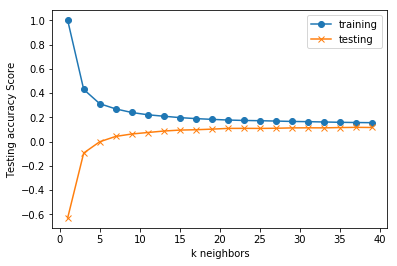

In [14]:
from sklearn.neighbors import KNeighborsRegressor
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 40, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 40, 2), train_scores, marker='o', label='training')
plt.plot(range(1, 40, 2), test_scores, marker="x", label='testing')
plt.legend()
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Note that k: 19 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsRegressor(n_neighbors=27)
knn.fit(X_train_scaled, y_train_scaled)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test_scaled))

k=19 Test Acc: 0.110


In [17]:
# Use our model to make predictions
#predictions = knn.predict(X.iloc[6].values.reshape(1, -1))
predictions = knn.predict(X_test_scaled)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Overall Score for the model

training_r2 = knn.score(X_train_scaled, y_train_scaled)
testing_r2 = knn.score(X_test_scaled, y_test_scaled) 

print(f"Training R2 Score: {training_r2}")
print(f"Testing R2 Score: {testing_r2}")

# Score the predictions with mse and r2
testing_mse = mean_squared_error(y_test_scaled, predictions)

print(f"Testing Mean Squared Error (MSE): {testing_mse}")

Training R2 Score: 0.16885342938812495
Testing R2 Score: 0.10952340663194227
Testing Mean Squared Error (MSE): 0.8450457189377745
